In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scripts.data_quality_checks import (
    load_dataset, handle_anomalies
)

In [2]:
# Load the datasets
df_benin = load_dataset('data/benin-malanville.csv')

In [3]:
# Handle anomalies in the dataset
handle_anomalies(
    df_benin,
    negative_value_columns=['GHI', 'DNI', 'DHI'],
    outlier_columns=['ModA', 'ModB', 'WS', 'WSgust'],
    lower_percentile=0.05,
    upper_percentile=0.95
)


Missing Values in Each Column:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [4]:
# Select the relevant columns
corr_data = df_benin[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']]

# Calculate the correlation matrix
corr_matrix = corr_data.corr()

# Display the correlation matrix
print(corr_matrix)

            GHI       DNI       DHI     TModA     TModB
GHI    1.000000  0.882251  0.848445  0.919728  0.873870
DNI    0.882251  1.000000  0.543834  0.790094  0.755755
DHI    0.848445  0.543834  1.000000  0.823280  0.775887
TModA  0.919728  0.790094  0.823280  1.000000  0.983443
TModB  0.873870  0.755755  0.775887  0.983443  1.000000


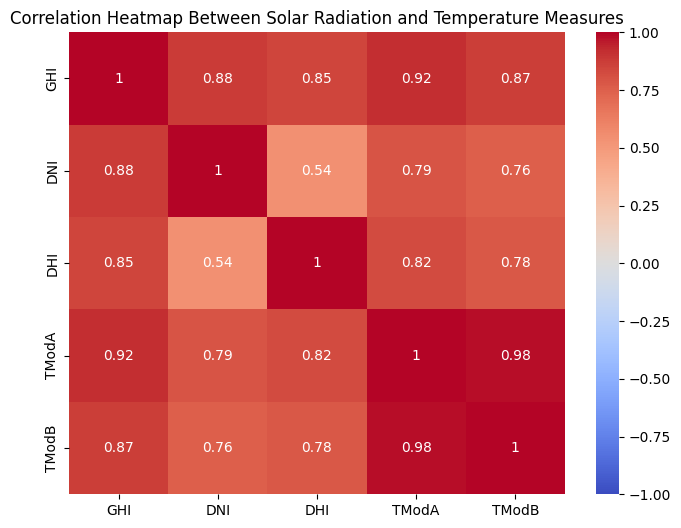

In [5]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap Between Solar Radiation and Temperature Measures')
plt.show()

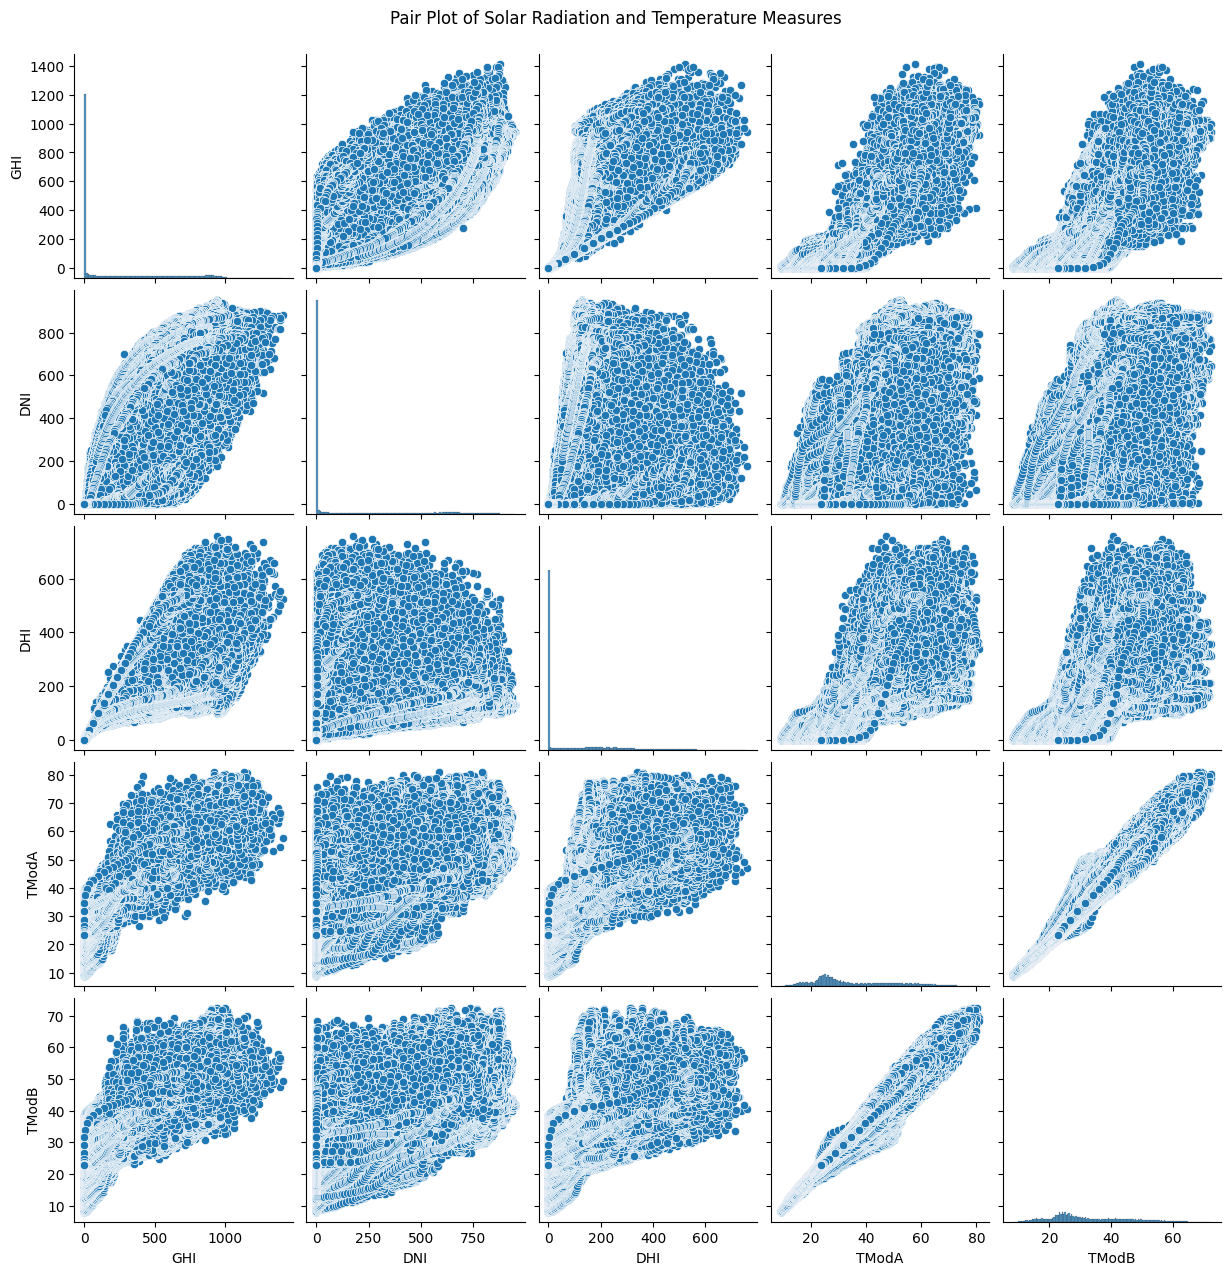

In [6]:
# Pair plot to visualize relationships
sns.pairplot(corr_data)
plt.suptitle('Pair Plot of Solar Radiation and Temperature Measures', y=1.02)
plt.show()

### Investigate the Relationship Between Wind Conditions and Solar Irradiance

In [7]:
# Select relevant columns
wind_data = df_benin[['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']]

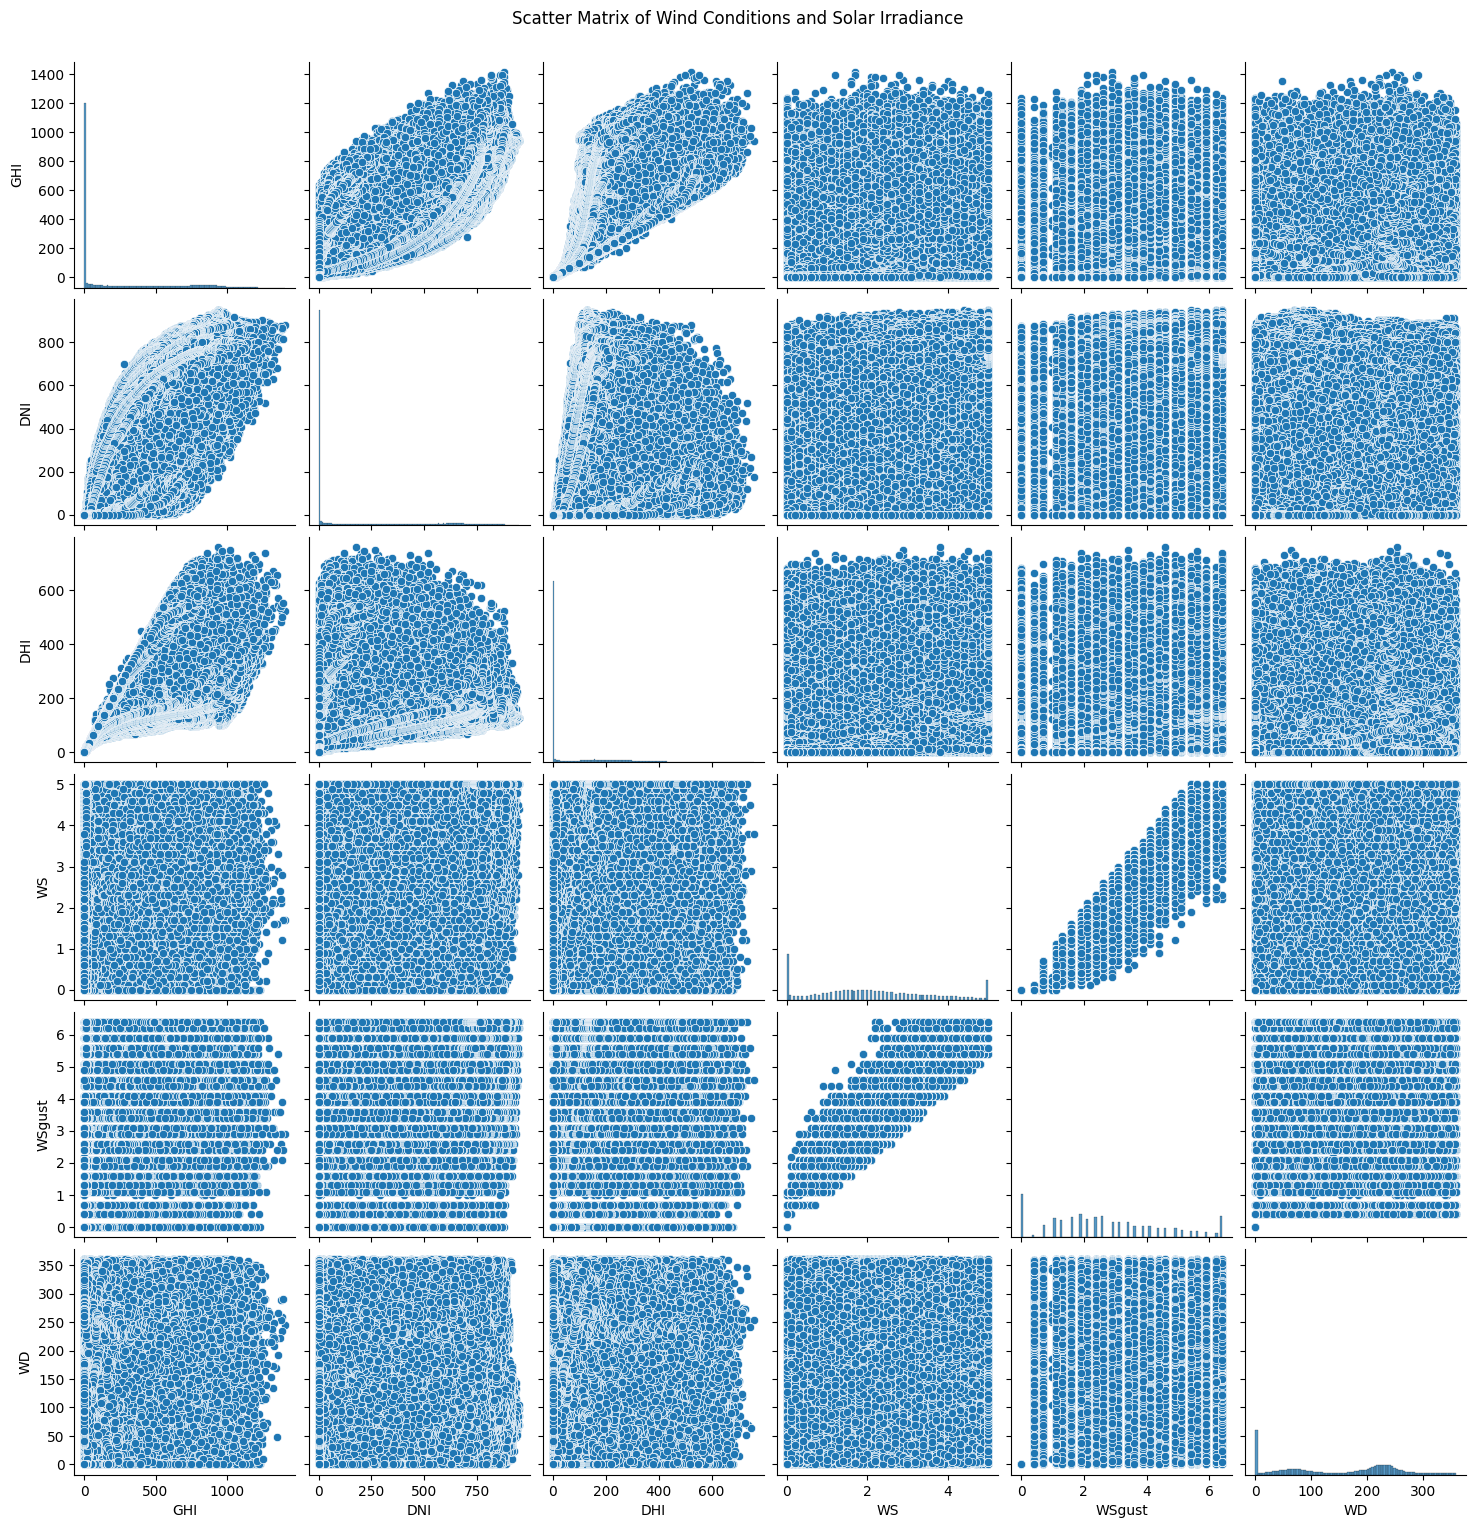

In [8]:
# Plot scatter matrix to investigate relationships between wind conditions and solar irradiance
sns.pairplot(wind_data)
plt.suptitle('Scatter Matrix of Wind Conditions and Solar Irradiance', y=1.02)
plt.show()

## Key Findings from Correlation Analysis and Scatter Matrix - Benin Dataset

### 1. **Correlation Between Solar Radiation and Temperature Measures**
- **Strong Positive Correlations:**
  - **GHI and TModA (0.92):** There is a very strong positive correlation between Global Horizontal Irradiance (GHI) and the temperature of Module A (TModA). This indicates that as solar irradiance increases, the module temperature rises significantly.
  - **GHI and TModB (0.87):** Similarly, there is a strong positive correlation between GHI and the temperature of Module B (TModB), showing a strong influence of solar irradiance on module temperature.
  - **TModA and TModB (0.98):** The near-perfect correlation between TModA and TModB suggests that both modules are subjected to similar conditions, resulting in almost identical temperature readings.

- **Moderate Positive Correlations:**
  - **GHI and DNI (0.88):** There is a strong correlation between GHI and Direct Normal Irradiance (DNI), reflecting the relationship between total solar irradiance and its direct component.
  - **DHI and TModA/TModB (0.82/0.78):** Diffuse Horizontal Irradiance (DHI) shows a moderate correlation with module temperatures, indicating that diffuse light also contributes to module warming.

- **Weaker Correlations:**
  - **DNI and DHI (0.54):** The weaker correlation between DNI and DHI highlights the different atmospheric factors influencing direct and diffuse sunlight.

### 2. **Scatter Matrix of Wind Conditions and Solar Irradiance**
- **No Strong Correlation Between Wind Conditions and Solar Irradiance:**
  - **GHI, DNI, DHI vs. Wind Conditions (WS, WSgust, WD):** The scatter matrix reveals no significant correlation between wind conditions (wind speed, gusts, and direction) and solar irradiance components. This suggests that wind-related factors do not directly influence the levels of solar radiation received by the sensors.

- **Relationships Among Wind Conditions:**
  - **WS vs. WSgust:** There is a strong positive linear relationship between wind speed (WS) and wind gust (WSgust), as expected.
  - **No Clear Patterns with WD:** Wind direction (WD) does not show a significant relationship with either wind speed or gusts, indicating independence.

### 3. **Overall Insights**
- **Temperature Dependence on Solar Irradiance:** The module temperatures (TModA, TModB) are strongly influenced by the overall solar irradiance (GHI), with diffuse light (DHI) also contributing, though to a lesser extent.
- **Independence of Solar Irradiance and Wind Conditions:** Wind conditions appear to have little to no impact on the solar irradiance levels, suggesting that other environmental factors like cloud cover or atmospheric conditions play a more significant role in affecting solar radiation.